In [1]:
import pandas as pd
import os
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

from utils import split_timestamp, add_time_aggs, read_file_and_clean

In [2]:
sleep = read_file_and_clean("sleep")

In [3]:
sleep_schedule = pd.DataFrame({
    "timestamp": pd.to_datetime(
        sleep["start_date"].dt.strftime("%Y-%m-%d") + sleep["start_hour"] + sleep["start_minute"]
    ),
    "status": "asleep",
    "duration": sleep.duration,
})

In [4]:
full_schedule = pd.concat(
    [
        pd.DataFrame(
            {
                "timestamp": sleep_schedule.timestamp
                + pd.to_timedelta(sleep_schedule.duration, "m"),
                "status": "awake",
            }
        ),
        sleep_schedule[["timestamp", "status"]],
    ]
).sort_values(by="timestamp")

In [5]:
lifespan = pd.Series(
    pd.date_range(
        "2021-05-16 16:00:00",
        "2021-11-16 06:30:00",
        freq="10min"
    ),
    name="minute"
)

In [6]:
sched_plot = pd.merge_asof(
    lifespan,
    full_schedule,
    right_on="timestamp",
    left_on="minute"
)
sched_plot[["date", "time"]] = sched_plot["minute"].astype(str).str.split(" ", expand=True)

sched_plot["sleep"] = (sched_plot["status"] == "asleep").astype(float)

<AxesSubplot:xlabel='date', ylabel='time'>

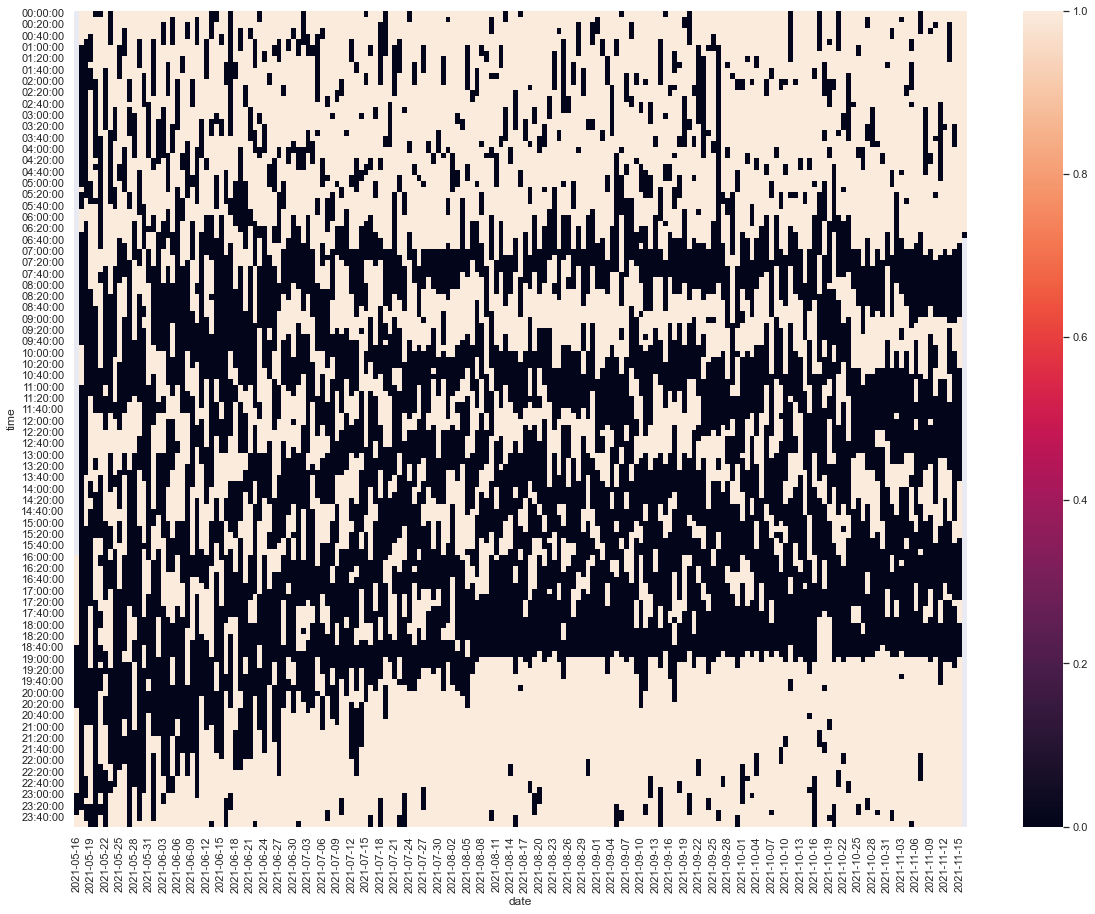

In [7]:
sns.set(rc={'figure.figsize':(20,15)})

sns.heatmap(sched_plot.pivot(
    index="time",
    columns="date",
    values="sleep"
))